In [1]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.assemblies import AssemblyExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from time import time

In [2]:
# Overwrite default parameters (pelenet/parameters/ and pelenet/experiments/random.py)
parameters = {
    # Experiment
    'seed': 1,  # Random seed
    'trials': 20,  # Number of trials
    'stepsPerTrial': 50,  # Number of simulation steps for every trial
    'isReset': True,  # Activate reset after every trial
    # Network
    'reservoirExSize': 400,  # Number of excitatory neurons
    'reservoirConnPerNeuron': 35,  # Number of connections per neuron
    # Neurons
    'refractoryDelay': 2, # Refactory period
    'voltageTau': 100,  # Voltage time constant
    'currentTau': 5,  # Current time constant
    'thresholdMant': 1200,  # Spiking threshold for membrane potential
    # Plasticity
    'isLearningRule': True,
    'learningRule': '2^-2*x1*y0 - 2^-2*y1*x0 + 2^-4*x1*y1*y0 - 2^-3*y0*w*w',
    # Input
    'inputGenSpikeProb': 0.8,  # Probability of spikes for the spike generators
    'inputNumTargetNeurons': 40,  # Number of neurons targeted by the spike generators
    'inputSteps': 30,  # Number of steps the input is active
    # Probes
    'isExSpikeProbe': True,  # Probe excitatory spikes
    'isInSpikeProbe': True,  # Probe inhibitory spikes
    'isWeightProbe': True  # Probe weight matrix at the end of the simulation
}

In [3]:
# Initilizes the experiment and utils
exp = AssemblyExperiment(name='assemblies', parameters=parameters)
utils = Utils.instance()

In [4]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

0.922

In [5]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:40375
INFO:DRV:      Host server up..............Done 0.02s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599825261.1685913
Include dir is : /home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1599825261.1685913/initnetwork_0_0.c
gcc -Wall -I/home/seq/pelenet/pelenet/snips/ -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.

INFO:DRV:      Booting up..................Done 1.10s
INFO:DRV:      Transferring spikes.........Done 0.07s
INFO:DRV:      Transferring probes.........Done 0.06s
INFO:DRV:      Configuring registers.......Done 0.44s
INFO:HST:  chip=0 cpu=0 Transfered values 20, 70, 10 
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 0 to 10
INFO:HST:  chip=0 cpu=0 Reset functional state at 10
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 70 to 80
INFO:HST:  chip=0 cpu=0 Reset functional state at 80
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 140 to 150
INFO:HST:  chip=0 cpu=0 Reset functional state at 150
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 210 to 220
INFO:HST:  chip=0 cpu=0 Reset functional state at 220
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 280 to 290
INFO:HST:  chip=0 cpu=0 Reset functional state at 290
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 350 to 360
INFO:HST:  chip=0 cpu=0 Reset funct

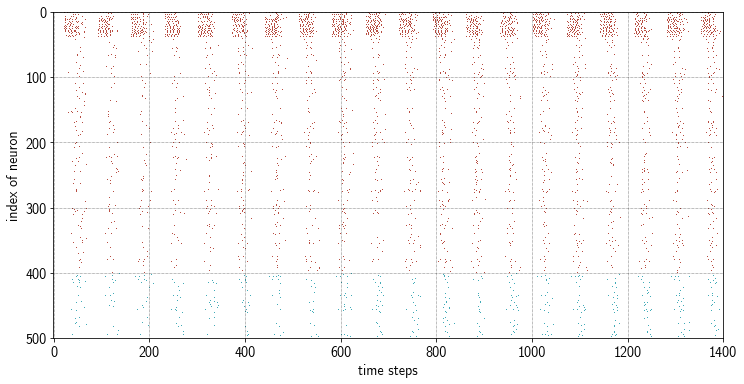

In [6]:
# Plot spike trains of the excitatory (red) and inhibitory (blue) neurons
exp.net.plot.reservoirSpikeTrain(figsize=(12,6))

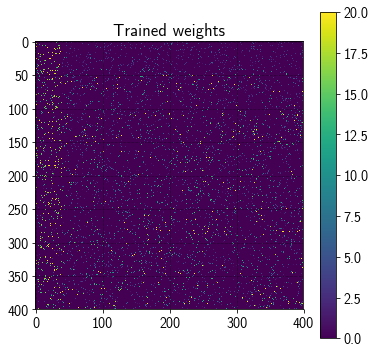

In [7]:
# Weight matrix after learning
exp.net.plot.trainedExWeightMatrix()

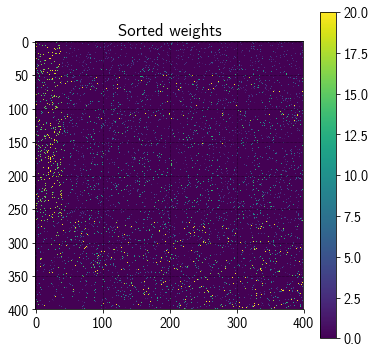

In [8]:
# Sorted weight matrix after learning
supportMask = utils.getSupportWeightsMask(exp.net.trainedWeightsExex)
exp.net.plot.weightsSortedBySupport(supportMask)